# Task 1: Convolution
To finish the task, one thing to do is to generate the masks/ filters. In particular, for the generation of Haar-like filters, different sizes must be taken into consideration.Another thing to do is to build a function that can do a 2D convolution of a filter and an image. The final step is to call the convolution function with the image and different filters as the parameters.

In [1]:
import numpy as np
import cv2
def convolute(image, filter):
#     if filter == None:
#         print("err: in convolute(image, filter): None image or filter")
#         return None
    imageSizeX = image.shape[0]
    imageSizeY = image.shape[1]
    filterSizeX = filter.shape[0]
    filterSizeY = filter.shape[1]
    outputSizeX = imageSizeX
    outputSizeY = imageSizeY
    output = output = np.zeros((outputSizeX, outputSizeY))
    # Go through all the positions. For a fixed posirion, apply the filter (stick the filter on the image from the position),
    for posX in range(0, imageSizeX-filterSizeX+1):
        for posY in range(0, imageSizeY-filterSizeY+1):
            # Local Convolution: Then use index i and j to visit filter(i, j) and image(posX+i, posY+j), multiply and sum to F
            F=0
            for i in range(0, filterSizeX):
                for j in range(0, filterSizeY):
                    F+=filter[i][j]*image[posX+i][posY+j]
            outputPosX = int(posX+filterSizeX/2)
            outputPosY = int(posY+filterSizeY/2)
            if (outputPosX < outputSizeX and outputPosY < outputSizeY):
                output[outputPosX][outputPosY] = F
            # Give F to a position on the output 
    return output

[[ 0.  0.]
 [ 0. -6.]]
[[ 0.  0.  0.]
 [ 0. -6. -1.]
 [ 0.  3.  1.]]
[[ 0.  0.  0.]
 [ 0. -6. -1.]
 [ 0.  3.  1.]
 [ 0.  5. -4.]]
[[0. 2. 0.]
 [0. 9. 0.]
 [0. 5. 0.]
 [0. 4. 0.]]


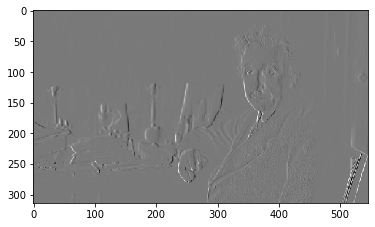

In [2]:
# testing block:
image=np.array([[0,1],[3,10]])
filter = np.array([[-1,1],[1,-1]])
print(convolute(image, filter))
image1=np.array([[0,1,2],[3,10,12],[4,8,9]])
print(convolute(image1, filter))
image2=np.array([[0,1,2],[3,10,12],[4,8,9],[1,0,5]])
print(convolute(image2, filter))
filter1 = np.array([[-1,0,1]])
print(convolute(image2, filter1))
filter2 = np.array([[-1,1]])

from PIL import Image
from pylab import *
image3 = np.array(Image.open('einstein.png').convert('L'),'f')
output=convolute(image3, filter2)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()

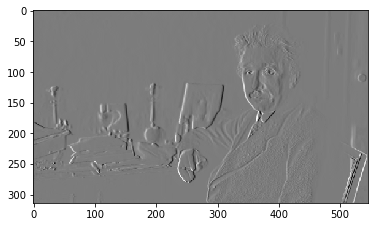

In [3]:
output=convolute(image3, filter1)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()

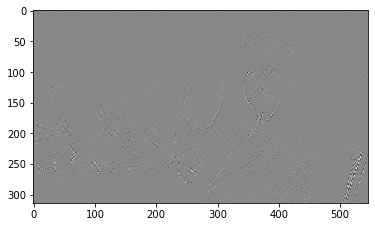

In [4]:
output=convolute(image3, filter)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()

Now build the function to generate filters.there are in general 3 types of filters: the Gaussian Filter, the Sobel filter and the Haar-like filters. For the generation of Haar-like filters, we must be able to set the size of the filters. Thus two parameters are required for the function: filterType and filterSize.
In particular, the Continuous Gaussian distribution is given by:
\begin{align}
h_{\sigma}(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
\end{align}
The center of the Gaussian distribution is $(x = 0, y = 0)$. To move that to the kernel center $(x = \lfloor \frac{kernelSize}{2} \rfloor, y = \lfloor \frac{kernelSize}{2} \rfloor), kernelSize = 2k+1$ we need:
\begin{align}
g_{\sigma}(x, y)=h_{\sigma}(x-\lfloor \frac{kernelSizeX}{2} \rfloor, y-\lfloor \frac{kernelSizeY}{2} \rfloor)
\end{align}
For kernelSize that is $2k$, or say, kernelSize is an even number, we need get it to the nearest odd number by $-1$.

In [5]:
import numpy as np
def getFilterOfSize(filterType, filterSize):
    if filterType == 'gaussian':
        sigma = 2
        filter = np.zeros((filterSize, filterSize))
        indexShift = filterSize//2
        print(indexShift)
        for i in range(0,filterSize):
            for j in range(0,filterSize):
                filter[i][j]=(1/(2*np.pi*sigma**2))*np.exp(-((i-indexShift)**2 + (j-indexShift)**2)/(2*sigma**2))
    elif filterType == 'sobel':
        filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif filterType == 'haar1':
        filter = np.array([[-1,1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar2':
        filter = np.array([[-1],[1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar3':
        filter = np.array([[-1,1,-1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar4':
        filter = np.array([[-1],[1],[-1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar5':
        filter = np.array([[-1,1],[1,-1]])  
        filter = augmentFilter(filter, filterType, filterSize)
#     else:
#         print("err: in getFilterOfSize: incorrect filter type")
#         filter = None
    return filter

In [6]:
def augmentFilter(filter, filterType, augTimes):
    filterSizeX = filter.shape[0]
    filterSizeY = filter.shape[1]
    augFilterSizeX = filterSizeX * augTimes
    augFilterSizeY = filterSizeY * augTimes
    
    if filterType == 'gaussian':
        from scipy.ndimage import gaussian_filter
        array = np.arange(50, step=2).reshape((5,5))
        filter = gaussian_filter(array, sigma=1)
    elif filterType == 'sobel':
        filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif filterType == 'haar1':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if j < (augFilterSizeY)/2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar2':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if i < (augFilterSizeX)/2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar3':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if j >= (augFilterSizeY)/3 and j < augFilterSizeY/3*2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar4':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if i >= (augFilterSizeX)/3 and i < augFilterSizeX/3*2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar5':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if (i < (augFilterSizeX)/2 and j < augFilterSizeY/2) or (i >= augFilterSizeX/2 and j >= augFilterSizeY/2):
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    
    return augFilter

3
3
[[0.0041937  0.00783487 0.01139966 0.01291751 0.01139966 0.00783487
  0.0041937 ]
 [0.00783487 0.01463746 0.02129738 0.02413309 0.02129738 0.01463746
  0.00783487]
 [0.01139966 0.02129738 0.0309875  0.03511344 0.0309875  0.02129738
  0.01139966]
 [0.01291751 0.02413309 0.03511344 0.03978874 0.03511344 0.02413309
  0.01291751]
 [0.01139966 0.02129738 0.0309875  0.03511344 0.0309875  0.02129738
  0.01139966]
 [0.00783487 0.01463746 0.02129738 0.02413309 0.02129738 0.01463746
  0.00783487]
 [0.0041937  0.00783487 0.01139966 0.01291751 0.01139966 0.00783487
  0.0041937 ]]


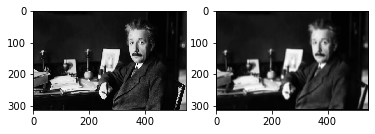

In [26]:
# testing block of gaussian filter:
filter3 = getFilterOfSize('gaussian',7)
print(getFilterOfSize('gaussian',7))

#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

output=convolute(image3, filter3)

ax1.imshow(image3, aspect='auto', cmap='gray', interpolation='none')
ax2.imshow(output, aspect='auto', cmap='gray', interpolation='none')
plt.show()

[[-1. -1.  1.  1.]
 [-1. -1.  1.  1.]
 [ 1.  1. -1. -1.]
 [ 1.  1. -1. -1.]]
[[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]]


<Figure size 432x288 with 0 Axes>

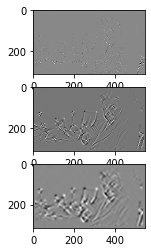

In [8]:
# testing block of augmentFilter haar5:
print(augmentFilter(np.array([[-1,1],[1,-1]]),'haar5',2))
print(augmentFilter(np.array([[-1,1],[1,-1]]),'haar5',5))

fig = plt.figure()

f, axarr = plt.subplots(3,1) 

filter5 = getFilterOfSize('haar5',5)
filter6 = getFilterOfSize('haar5',1)
filter7 = getFilterOfSize('haar5',10)
output=convolute(image3, filter5)
output1=convolute(image3, filter6)
output2=convolute(image3, filter7)

axarr[0].imshow(output1, cmap='gray', interpolation='none')
axarr[1].imshow(output, cmap='gray', interpolation='none')
axarr[2].imshow(output2, cmap='gray', interpolation='none')

[[ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


<Figure size 432x288 with 0 Axes>

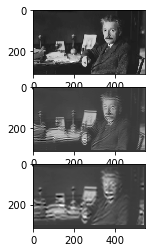

In [9]:
# testing block of augmentFilter haar4:
print(augmentFilter(np.array([[1],[-1],[1]]),'haar4',2))
print(augmentFilter(np.array([[1],[-1],[1]]),'haar4',4))

fig = plt.figure()

f, axarr = plt.subplots(3,1) 

filter5 = getFilterOfSize('haar4',5)
filter6 = getFilterOfSize('haar4',1)
filter7 = getFilterOfSize('haar4',10)
output=convolute(image3, filter5)
output1=convolute(image3, filter6)
output2=convolute(image3, filter7)

axarr[0].imshow(output1, cmap='gray', interpolation='none')
axarr[1].imshow(output, cmap='gray', interpolation='none')
axarr[2].imshow(output2, cmap='gray', interpolation='none')

[[ 1.  1. -1. -1.  1.  1.]
 [ 1.  1. -1. -1.  1.  1.]]
[[ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.]]


<Figure size 432x288 with 0 Axes>

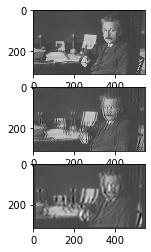

In [10]:
# testing block of augmentFilter haar3:
print(augmentFilter(np.array([[1,-1,1]]),'haar3',2))
print(augmentFilter(np.array([[1,-1,1]]),'haar3',4))

fig = plt.figure()

f, axarr = plt.subplots(3,1) 

filter5 = getFilterOfSize('haar3',5)
filter6 = getFilterOfSize('haar3',1)
filter7 = getFilterOfSize('haar3',10)
output=convolute(image3, filter5)
output1=convolute(image3, filter6)
output2=convolute(image3, filter7)

axarr[0].imshow(output1, cmap='gray', interpolation='none')
axarr[1].imshow(output, cmap='gray', interpolation='none')
axarr[2].imshow(output2, cmap='gray', interpolation='none')

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


<Figure size 432x288 with 0 Axes>

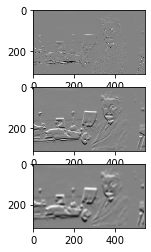

In [11]:
# testing block of augmentFilter haar2:
print(augmentFilter(np.array([[-1],[1]]), 'haar2', 2))
print(augmentFilter(np.array([[-1],[1]]), 'haar2', 5))

fig = plt.figure()

f, axarr = plt.subplots(3,1) 

filter5 = getFilterOfSize('haar2',5)
filter6 = getFilterOfSize('haar2',1)
filter7 = getFilterOfSize('haar2',10)
output=convolute(image3, filter5)
output1=convolute(image3, filter6)
output2=convolute(image3, filter7)

axarr[0].imshow(output1, cmap='gray', interpolation='none')
axarr[1].imshow(output, cmap='gray', interpolation='none')
axarr[2].imshow(output2, cmap='gray', interpolation='none')

[[-1. -1.  1.  1.]
 [-1. -1.  1.  1.]]
[[-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]]


<Figure size 432x288 with 0 Axes>

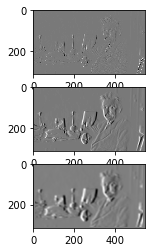

In [12]:
# testing block of augmentFilter haar1:
import numpy as np
print(augmentFilter(np.array([[-1,1]]), 'haar1', 2))
print(augmentFilter(np.array([[-1,1]]), 'haar1', 3))

#test block:
fig = plt.figure()

f, axarr = plt.subplots(3,1) 

filter5 = getFilterOfSize('haar1',5)
filter6 = getFilterOfSize('haar1',1)
filter7 = getFilterOfSize('haar1',10)
output=convolute(image3, filter5)
output1=convolute(image3, filter6)
output2=convolute(image3, filter7)

axarr[0].imshow(output1, cmap='gray', interpolation='none')
axarr[1].imshow(output, cmap='gray', interpolation='none')
axarr[2].imshow(output2, cmap='gray', interpolation='none')

# ax1.imshow(output1, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# ax3.imshow(output2, cmap='gray', interpolation='none')
plt.show()

0
[[0.03978874]]


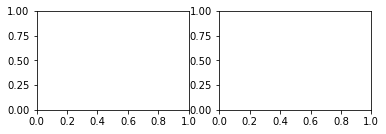

In [13]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter3 = getFilterOfSize('gaussian',1)
print(filter3)
# output=convolute(image3, filter3)


# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

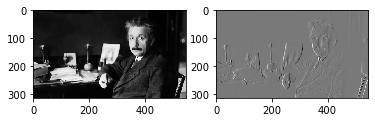

In [14]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter4 = getFilterOfSize('sobel',1)
output=convolute(image3, filter4)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

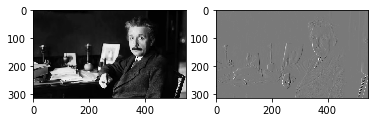

In [15]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter5 = getFilterOfSize('haar1',1)
output=convolute(image3, filter5)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

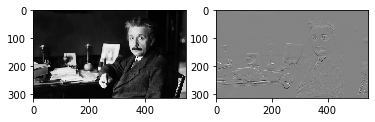

In [16]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter6 = getFilterOfSize('haar2',1)
output=convolute(image3, filter6)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

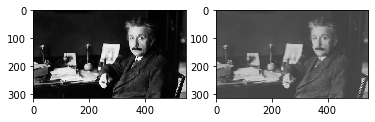

In [17]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter7 = getFilterOfSize('haar3',1)
output=convolute(image3, filter7)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

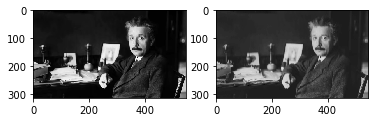

In [18]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter8 = getFilterOfSize('haar4',1)
output=convolute(image3, filter8)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

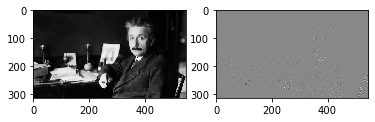

In [19]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

filter9 = getFilterOfSize('haar5',1)
output=convolute(image3, filter9)

ax1.imshow(image3, cmap='gray', interpolation='none')
ax2.imshow(output, cmap='gray', interpolation='none')
plt.show()

In [20]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter9 = getFilterOfSize('haar?',1)
# output=convolute(image3, filter9)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()